# Power Spectrum 
## Calculate the power spectrum using a 3D grid
Generate a the density field of the galaxy positions using a 3D grid
Using the 3D grid, then calculate the power spectrum using the powerbox package

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# using positions [x,y,x]
pos_x = gals["Pos_0"]
pos_y = gals["Pos_1"]
pos_z = gals["Pos_2"]

Pos = np.array([pos_x, pos_y, pos_z])
Pos.T.shape
Pos_new=Pos.T # Transpose the Pos so it is in format (N,D) array
Pos_new.shape

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
gals.columns #returns all avaiable properties of galxies

#sim_props # returns sim props if you want to check

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

# HI MASS

In [2]:
gals["HIMass"].shape
HIMass = gals["HIMass"]
#HIMass.shape, HIMass, min(HIMass), max(HIMass)
# get mass and convert to proper units
#HIMass = np.log10(gals["HIMass"]*1e10)
#HIMass.shape, HIMass, min(HIMass), max(HIMass)
# Get rid of inf's in HIMass
#HIMass = HIMass[np.isfinite(HIMass)]
HIMass.shape, HIMass, min(HIMass), max(HIMass)


((1648367,),
 0          0.003654
 1          0.000851
 2          0.000356
 3          0.000015
 4          0.000887
              ...   
 1648362    0.000000
 1648363    0.000000
 1648364    0.000000
 1648365    0.000000
 1648366    0.000000
 Name: HIMass, Length: 1648367, dtype: float32,
 0.0,
 63.324520111083984)

# HALO MASS

In [3]:
gals["Mvir"].shape
Mvir = gals["Mvir"]
#HIMass.shape, HIMass, min(HIMass), max(HIMass)
# get mass and convert to proper units
#HIMass = np.log10(gals["HIMass"]*1e10)
#HIMass.shape, HIMass, min(HIMass), max(HIMass)
# Get rid of inf's in HIMass
#HIMass = HIMass[np.isfinite(HIMass)]
Mvir.shape, Mvir, min(Mvir), max(Mvir)

((1648367,),
 0           2.575082
 1           2.366804
 2          34.214512
 3           0.965656
 4           2.366804
              ...    
 1648362     0.605902
 1648363     0.605902
 1648364     0.605902
 1648365     0.605902
 1648366     0.605902
 Name: Mvir, Length: 1648367, dtype: float32,
 0.6059017181396484,
 208860.578125)

## use this if 1st attempt doesnt work
### MAKE 3D array for grid later
#HIMass = np.array([HIMass, HIMass, HIMass])
#HIMass.T.shape
#HIMass_new=HIMass.T # Transpose the HIMass so it is in format (N,D) array

## Create 3D grid of galaxy positions
### 1. Calculate the edges of the grid
### 2. Calculate the deltax
    delta x = (Pos/edges)
### 3. Get the 3D grid
    using histogram 3D

In [4]:
# getting bits ready for 3D grid 
boxsize = 178.57142857142858 # get the box size, this is from sims pops 
dim = len(Pos) # number of dimensions in 3D space =3
boxlength = [boxsize] * dim #get box length for each side of box
N = pos_x.shape # = 1648367
#N = 100
V = np.product(boxlength)
#print('dim : ', dim)
#print('boxlength : ', boxlength)
#print('N : ', N)
#print('V : ', V)
#N_dim = [N] * dim # to make iterable
#print('N : ', N)
#print('Pos : ', Pos)
#Pos = np.squeeze(Pos)
#print('Pos : ', Pos)
#N[0] / boxsize

# Create 3D grid for 
## 1. Galaxy positions ($\rho_{x}$)

In [5]:
nbins=100 # define the number of bins for our 3D grid
rhox, edges = np.histogramdd(Pos_new, bins=nbins) #[0].astype("float") # calculate the 3D grid using histogramdd
# RETURNS GALAXY COUNTS (rhox) and bins
rhox.shape, edges[0].size, edges[1].size, edges[2].size
#so its done 10 x omega = deltax / np.mean(deltax) - 1 # calcualte the over density
#print('omega: ', omega)10 x 10 by default
#rhox # This returns the number of galaxies in each grid

((100, 100, 100), 101, 101, 101)

## 2. HIMass $\rho_{HIMass}$

In [6]:
#rhoHIMass, edgesHIMass = np.histogramdd(HIMass_new, bins=nbins, normed=True) #[0].astype("float") # calculate the 3D grid using histogramdd
#rhoHIMass.shape, edgesHIMass[0].size # 1D only

rhoHIMass, edgesHIMass = np.histogramdd(Pos_new, bins=nbins, weights=HIMass) #[0].astype("float") # calculate the 3D grid using histogramdd
#rhoHIMass.shape, edgesHIMass[0].size # 1D only
#rhoHIMass

# Calculate the density using the mean of the density field:

$\delta = \frac{\rho(x)}{\bar{\rho(x)}}$

## Galaxies:

In [7]:
delta = rhox / np.mean(rhox) - 1 # calcualte the over density
#print('omega: ', omega)
#delta[0]

## HI Mass 

In [8]:
delta_HIMass = rhoHIMass / np.mean(rhoHIMass) - 1 # calculate the over density
#print('omega: ', omega)
#delta_HIMass[0]

## 3. M VIR (HALO MASS)

In [9]:
rhoMvir, edgesMvir = np.histogramdd(Pos_new, bins=nbins, weights=Mvir) #[0].astype("float") # calculate the 3D grid using histogramdd
#rhoMvir.shape, edgesMvir[0].size # 1D only
#rhoMvir

In [10]:
delta_Mvir = rhoMvir / np.mean(rhoMvir) - 1 # calculate the over density
#print('omega: ', omega)
delta_Mvir[0]

array([[-0.93702293,  2.26131202, -1.        , ..., 11.58791499,
        -0.95201748, -1.        ],
       [-0.09732882, 31.03583148, -0.5711562 , ..., -0.69860977,
         5.00531256, -0.59364803],
       [-0.55766111, -1.        , -1.        , ..., -0.87704479,
        -0.87404588,  0.45896861],
       ...,
       [-1.        , -0.92652676, -1.        , ...,  1.38713056,
        -0.32074742, -0.9415213 ],
       [-1.        , -1.        , -1.        , ..., -0.26826654,
        -0.56965672, -0.86205025],
       [-1.        , -1.        , -1.        , ...,  1.22069127,
         3.76376502, -1.        ]])

## Now lets do the Galaxy and HI Mass Power Spectrum 
### The only difference is that we add weights (HI_Mass is the weights for the PS)

In [11]:
# REDSHIFT z=0
# GALAXY PS = gal_ps, gal_k
# HIMASS PS = HIMass_ps, HIMass_k
gal_ps, gal_k = get_power(delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
HIMass_ps, HIMass_k = pbox.get_power(delta_HIMass,boxlength,remove_shotnoise=False)# WEIGHTS = HIMASS for HIMASS PS
Mvir_ps, Mvir_k = pbox.get_power(delta_Mvir,boxlength,remove_shotnoise=False)# WEIGHTS = HIMASS for HIMASS PS

# test first, then try less parameters if it goes wierd : p_k_field, bins_field = get_power(omega, boxlength)

#print('gal_ps (Galaxies): ', gal_ps)
#print('gal_k (Galaxies): ', gal_k)
#print('HIMass_ps (HI Mass): ', HIMass_ps)
#print('HIMass_k (HI Mass): ', HIMass_k)

# PLOT
## GALAXY PS

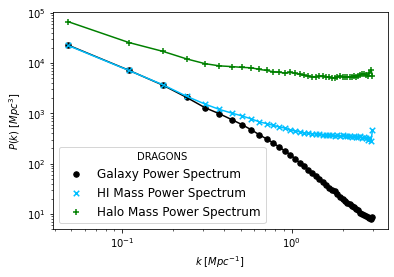

In [18]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])

# Labels and Legends
label_galsPS = ("Galaxy Power Spectrum")
label_HIMassPS = ("HI Mass Power Spectrum")
label_MvirPS = ("Halo Mass Power Spectrum")


# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=30)
ax.plot(HIMass_k,HIMass_ps,color="deepskyblue")
ax.scatter(HIMass_k,HIMass_ps,color="deepskyblue", label=label_HIMassPS,marker="x",s=30)
ax.plot(Mvir_k,Mvir_ps,color="green")
ax.scatter(Mvir_k,Mvir_ps,color="green", label=label_MvirPS, marker="+", s=30)

plt.legend(title=("DRAGONS"),
           loc='lower left',
           fontsize=12)

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_Mvir_logged" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")

# HI MASS PS

fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(bins_field_HI_Mass,p_k_field_HI_Mass,color="deepskyblue", label=label_z)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("PowerSpectrum_HIMass" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")